## Helper functions for CW1
Code provided in this notebook can be copied over to your python notebooks as required. 

In [2]:
# imports
import numpy as np
#for the sigmoid function we need expit() from scipy
import scipy.special
import os
# helper to load data from PNG image files# helpe 
import imageio
# glob helps select multiple files using patterns
import glob
# helps to manipulate the image for rotation 
from scipy import ndimage
%matplotlib inline
import matplotlib.pyplot as plt

# Task 1.3

## Helper function to create a new image by rotating a given image

The rotate_image function accepts inputs of size 784 corresponding to a single digit. It then reshapes it to 28*28 image before rotating clockwise and anticlockwise by a given degree. Thereafter returns both newwly created versions of the digit. 
You will be able to use this in Task 1.3 to create new training data to test ANN and / or kNN.
Remember when using this function to insert new training instances you must ensure that the class label is inserted to the corresponding targets array; otherwise you will not be able to use the new data within your machine learning algorithms when for instance training the ANN:

n = ANN(ouput_layer, hidden_layer, batch_size)

n.train(X_train, y_train, no_of_epochs, learning_rate)

OR when initialising the kNN with the augmented train data and class labels:
kNN(X_train, Y_train) functions.


In [3]:
from scipy import ndimage

In [4]:
def rotate_image(inputs, degree):
  
    ## create rotated variations
    # rotated anticlockwise by x degrees
    inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), degree, cval=0.01, order=1, reshape=False)
    new_inputs1 = inputs_plusx_img.reshape(784)
    # rotated clockwise by x degrees
    inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -degree, cval=0.01, order=1, reshape=False)
    new_inputs2 = inputs_minusx_img.reshape(784)
    
    return (new_inputs1, new_inputs2)



In [13]:
# create an image to test the rotation method
test_image = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,205,248,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,254,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,75,251,240,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,221,254,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,203,254,219,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,254,254,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,224,254,115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,254,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,242,254,254,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,254,219,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,207,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

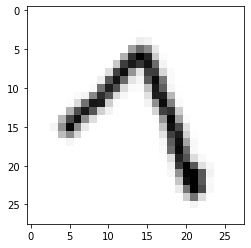

In [15]:
#rotate an image by a given degree
degree = 50
instance = test_image#X_my_test[3]
#print(instance.reshape(28,28))
new_image1, new_image2 = rotate_image(instance, degree)
# show rotated image
image_array = np.asfarray(new_image1).flatten().reshape((28,28))
# print the grid in grey scale
plt.imshow(image_array, cmap='Greys', interpolation='None') 

# Task 1.4
For kNN you need to use get_my_test_data to load and convert your handwritten digits for the algorithm. 

For ANN you need to use both get_my_test_data and map_target_to_output_layer to load and convert your handwritten digits for the algorithm. 

### Helper function for loading your hand written digits
In Task 1.4 you will be creating png files of your own handwritten digits and exploring how your algorithms perform when classifying these. 

The get_my_test_images function below takes a relative path as an input parameter and reads all the *.png files that are there. It then looks at the character just before the extension '.png' and considers this char as the class label. 

So for instance if you had an image called ../my_images/my_char_paper_9.png then it will extract 9 and use that as the class label. 
Therefore if you wish to use the function below make sure that the class of the digit appears just before the extension of the image file. Ensure that all your images are in a subfolder such as 'my_images'

Note that the returned X and y from this function is already in the format that will be acceptable for kNN's test function. However to use it on ANN you need to further process the class labels (i.e. y) such that they are aligned to the output nodes. For this , we have also provided a further function below:
helper_function_ann(X, Y)

In [16]:
def get_my_test_data(folder):
    # our own image test data set
    X = []
    y = []
    
    # to read jpg change the regex to '/*.jpg'
    folder_expr = folder + '/*.png'
    print(folder_expr)

    for image_file_name in glob.glob(folder_expr): 
        print ("loading ... ", image_file_name)

        # load image data from png files into an array
        img_array = imageio.imread(image_file_name, as_gray=True)
        # reshape from 28x28 to list of 784 values, invert values
        img_data  = 255.0 - img_array.reshape(784)
        # then scale data to range from 0.01 to 1.0
        inputs = (img_data / 255.0 * 0.99) + 0.01
        
        # use the filename to set the correct label
        digit_class = int(image_file_name[-5:-4]) #negative indices for indexing from the end of the array
        
        X.insert(len(X), inputs)
        y.insert(len(y), digit_class)
       
        pass
    return(X,y)
pass

my_images/*.png
loading ...  my_images/a9-9.png
loading ...  my_images/a7-7.png
loading ...  my_images/15-2.png
loading ...  my_images/a5-5.png
loading ...  my_images/a3-3.png
loading ...  my_images/a1-1.png
loading ...  my_images/28-2.png
loading ...  my_images/11-5.png
loading ...  my_images/17-7.png
loading ...  my_images/21060_6.png
loading ...  my_images/13-0.png
loading ...  my_images/21059_1.png
loading ...  my_images/17-4.png
loading ...  my_images/21062_7.png
loading ...  my_images/15-7.png
loading ...  my_images/26-8.png
loading ...  my_images/13-1.png
loading ...  my_images/21063_0.png
loading ...  my_images/a6-6.png
loading ...  my_images/a4-4.png
loading ...  my_images/a2-2.png
loading ...  my_images/23-9.png
loading ...  my_images/21058_5.png
loading ...  my_images/14-2.png
loading ...  my_images/a8-8.png
loading ...  my_images/16-4.png
loading ...  my_images/30-7.png
loading ...  my_images/12-1.png
loading ...  my_images/10-3.png
loading ...  my_images/21065_0.png
loadin

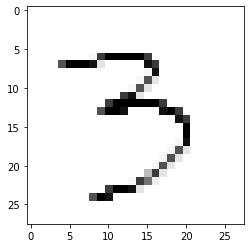

In [17]:
X_my_test, y_my_test = get_my_test_data('my_images') # my_images is a subfolder in the current folder 

# lets plot one of the created images that was read into X_my_test
# now reshape the 784 features into a 28x28 grid
# here asfarray helps to convert values into real numbers
image_array = np.asfarray(X_my_test[4]).flatten().reshape((28,28))

# print the grid in grey scale
plt.imshow(image_array, cmap='Greys', interpolation='None') 

### Helper function to prepare my image test data for ANN

Specific functions to convert the data into the input and output format that is suited for the ANN class (in ANN_2020.ipynb).
Here the class label value needs to be maped in to a format aligned to the output_nodes layer.

This expects that the variable output_nodes has been set according to you main ANN code. 

In [19]:
#MNIST dataset assume output_nodes = 10 for the ANN

# converts the data to a format that the ANN class can use for training the model
# this eseentially , maps a given target class label to an outputs vector (y_vec) thats compatible 
# with the ANN's output layer. 

#output_nodes = 10
def map_target_to_output_layer(instances, targets):
    X=[]
    Y=[]
    for inputs, target in zip(instances, targets):
        # create the target output values (all 0.01, except the desired label which is 0.99)
        y_vec = np.zeros(output_nodes) + 0.01
        y_vec[int(target)] = 0.99
        #print('output', target)
        
        X.insert(len(X), inputs) # simply inserting these they are already in the correct format
        Y.insert(len(Y), y_vec) # inserting these after the vector mapping
    pass
    return(X,Y)
pass

X_my_test, y_my_test = get_my_test_data('my_images')
X_my_test, y_my_test = map_target_to_output_layer(X_my_test, y_my_test)

my_images/*.png
loading ...  my_images/a9-9.png
loading ...  my_images/a7-7.png
loading ...  my_images/15-2.png
loading ...  my_images/a5-5.png
loading ...  my_images/a3-3.png
loading ...  my_images/a1-1.png
loading ...  my_images/28-2.png
loading ...  my_images/11-5.png
loading ...  my_images/17-7.png
loading ...  my_images/21060_6.png
loading ...  my_images/13-0.png
loading ...  my_images/21059_1.png
loading ...  my_images/17-4.png
loading ...  my_images/21062_7.png
loading ...  my_images/15-7.png
loading ...  my_images/26-8.png
loading ...  my_images/13-1.png
loading ...  my_images/21063_0.png
loading ...  my_images/a6-6.png
loading ...  my_images/a4-4.png
loading ...  my_images/a2-2.png
loading ...  my_images/23-9.png
loading ...  my_images/21058_5.png
loading ...  my_images/14-2.png
loading ...  my_images/a8-8.png
loading ...  my_images/16-4.png
loading ...  my_images/30-7.png
loading ...  my_images/12-1.png
loading ...  my_images/10-3.png
loading ...  my_images/21065_0.png
loadin

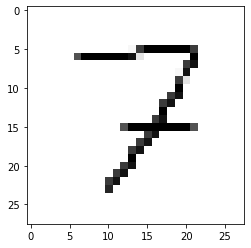

In [22]:
image_array = np.asfarray(X_my_test[1]).flatten().reshape((28,28))
# print the grid in grey scale
plt.imshow(image_array, cmap='Greys', interpolation='None') 